#<font color='Navy'> DATA ANALYSIS - SELECTING FEATURES

In [1]:
########### data manipulation #########
import pandas as pd

###### misc #######
import sys
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
module_path = '/content/drive/MyDrive/multilayer_perceptron_neural_network'
if module_path not in sys.path:
    sys.path.append(module_path)

from v2_utils_perceptron import *

#<font color='Navy'> Importing real data and info

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

[cleaner info](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[Detailed info](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=1308D2D7D7B7617756BFA116FE248A4E?sequence=1)



* predicting field 2, diagnosis: B = benign, M = malignant
* sets are linearly separable using all 30 input features
* **from the paper**: best predictive accuracy obtained using one separating plane in the 3-D space of Worst Area, Worst Smoothness and Mean Texture.  Estimated accuracy 97.5% using repeated 10-fold crossvalidations.  Classifier has correctly diagnosed 176 consecutive new patients as of November 1995.



In [4]:
#importing data
file_path = ('/content/drive/MyDrive/multilayer_perceptron_neural_network/data.csv')
df = pd.read_csv(file_path, header=None)

In [5]:
#adding column names
#converting Diagnosis to categorical
#assigning the ID to the Index
df = df_prepare_data(df)

In [6]:
df.describe()

Radius mean   Radius se  Radius worst  Texture mean  Texture se  \
count   569.000000  569.000000    569.000000    569.000000  569.000000   
mean     14.127292   19.289649     91.969033    654.889104    0.096360   
std       3.524049    4.301036     24.298981    351.914129    0.014064   
min       6.981000    9.710000     43.790000    143.500000    0.052630   
25%      11.700000   16.170000     75.170000    420.300000    0.086370   
50%      13.370000   18.840000     86.240000    551.100000    0.095870   
75%      15.780000   21.800000    104.100000    782.700000    0.105300   
max      28.110000   39.280000    188.500000   2501.000000    0.163400   

       Texture worst  Perimeter mean  Perimeter se  Perimeter worst  \
count     569.000000      569.000000    569.000000       569.000000   
mean        0.104341        0.088799      0.048919         0.181162   
std         0.052813        0.079720      0.038803         0.027414   
min         0.019380        0.000000      0.000000         0.106000   
25%         0.064920        0.029560      0.020310         0.161900   
50%         0.092630        0.061540      0.033500         0.179200   
75%         0.130400        0.130700      0.074000         0.195700   
max         0.345400        0.426800      0.201200         0.304000   

        Area mean  ...  Concavity worst  Concave points mean  \
count  569.000000  ...       569.000000           569.000000   
mean     0.062798  ...        16.269190            25.677223   
std      0.007060  ...         4.833242             6.146258   
min      0.049960  ...         7.930000            12.020000   
25%      0.057700  ...        13.010000            21.080000   
50%      0.061540  ...        14.970000            25.410000   
75%      0.066120  ...        18.790000            29.720000   
max      0.097440  ...        36.040000            49.540000   

       Concave points se  Concave points worst  Symmetry mean  Symmetry se  \
count         569.000000            569.000000     569.000000   569.000000   
mean          107.261213            880.583128       0.132369     0.254265   
std            33.602542            569.356993       0.022832     0.157336   
min            50.410000            185.200000       0.071170     0.027290   
25%            84.110000            515.300000       0.116600     0.147200   
50%            97.660000            686.500000       0.131300     0.211900   
75%           125.400000           1084.000000       0.146000     0.339100   
max           251.200000           4254.000000       0.222600     1.058000   

       Symmetry worst  Fractal dimension mean  Fractal dimension se  \
count      569.000000              569.000000            569.000000   
mean         0.272188                0.114606              0.290076   
std          0.208624                0.065732              0.061867   
min          0.000000                0.000000              0.156500   
25%          0.114500                0.064930              0.250400   
50%          0.226700                0.099930              0.282200   
75%          0.382900                0.161400              0.317900   
max          1.252000                0.291000              0.663800   

       Fractal dimension worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 30 columns]

#<font color='Navy'>Histograms

##<font color='Navy'>Histogram of the target variable Diagnosis
* B: benign vs M malign breast cancer tumor

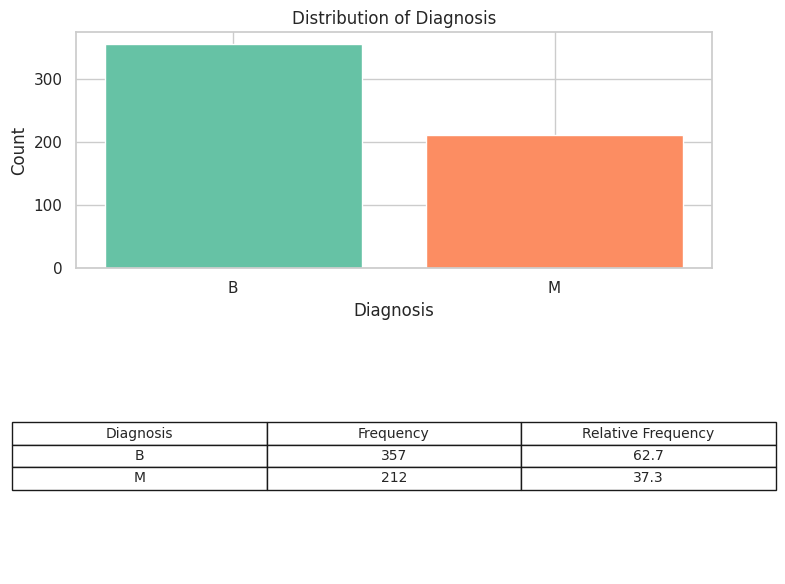

In [7]:
plot_categorical_distribution(df, 'Diagnosis')

##<font color='Navy'>Histogram of all the features - complete and by diagnosis

* We can see the distrbution of the feature
* and the distribution of the feature for each diagnosis

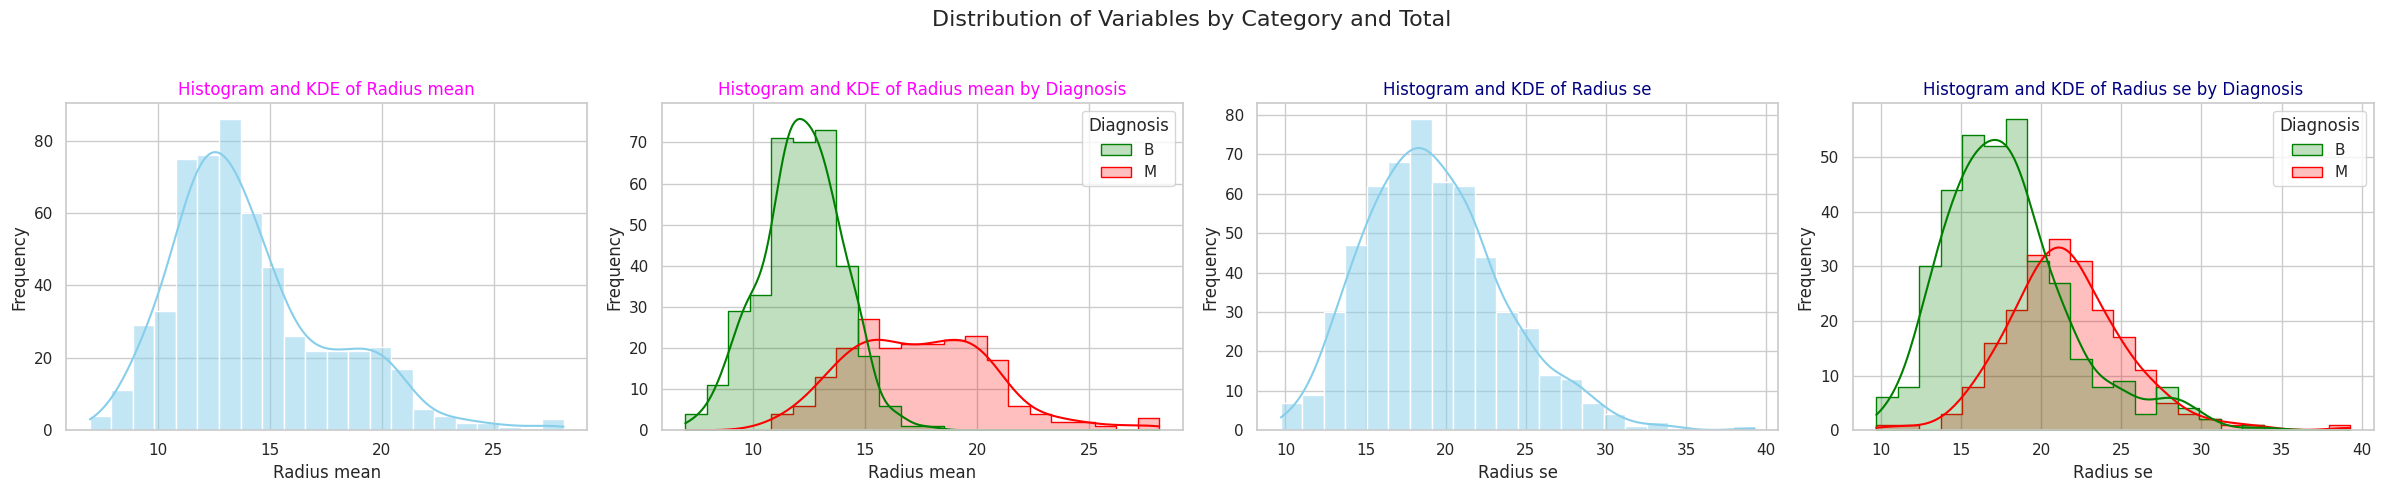

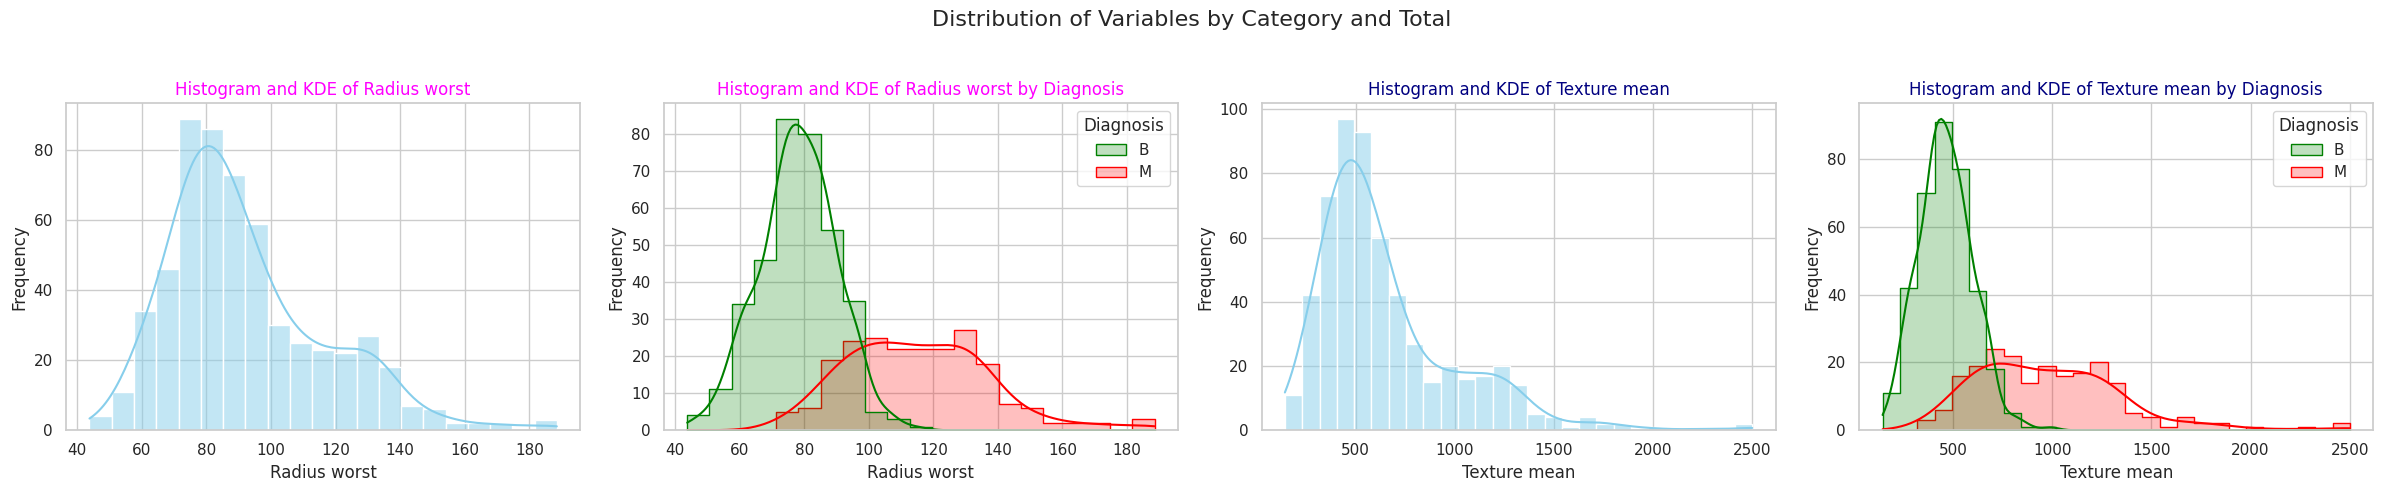

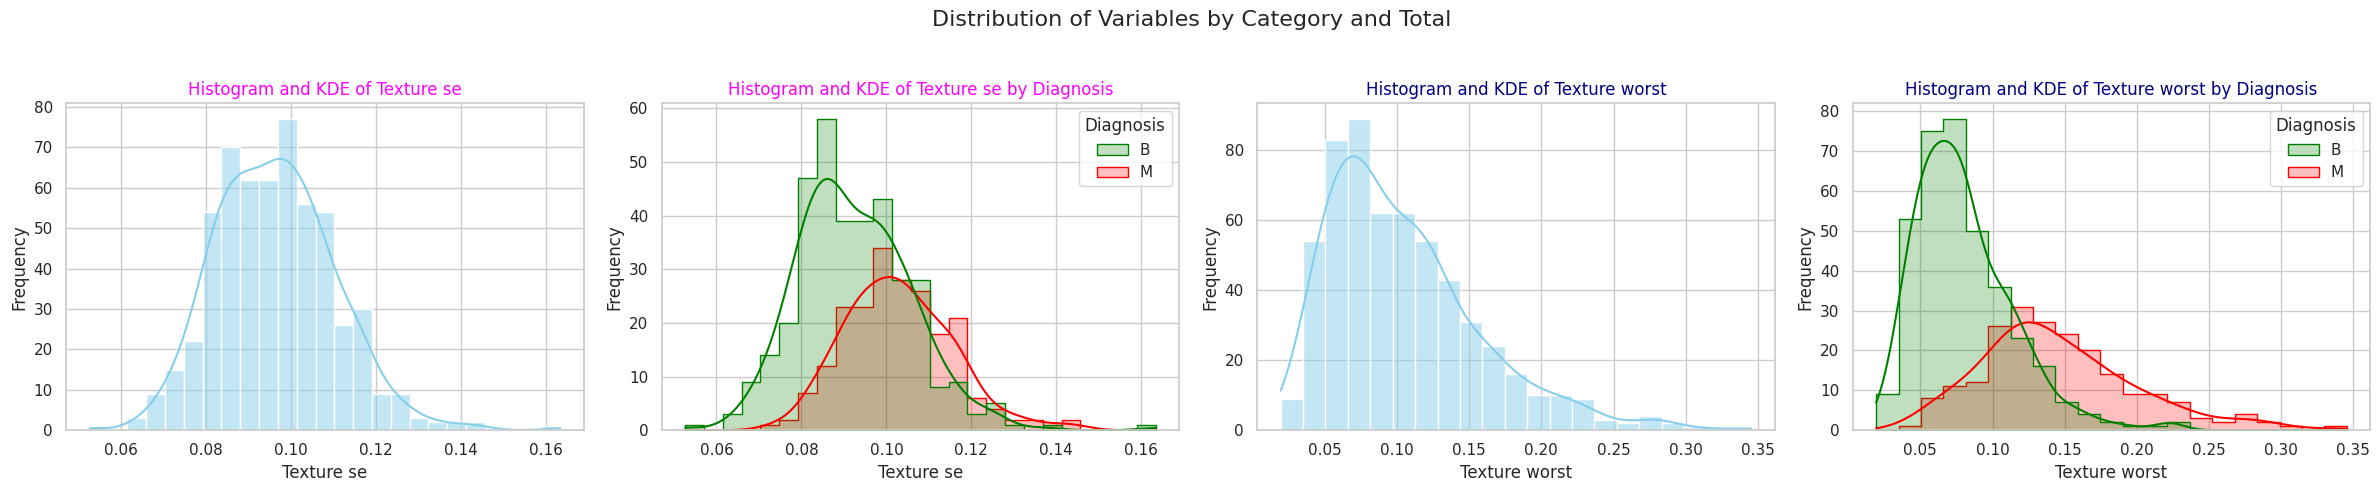

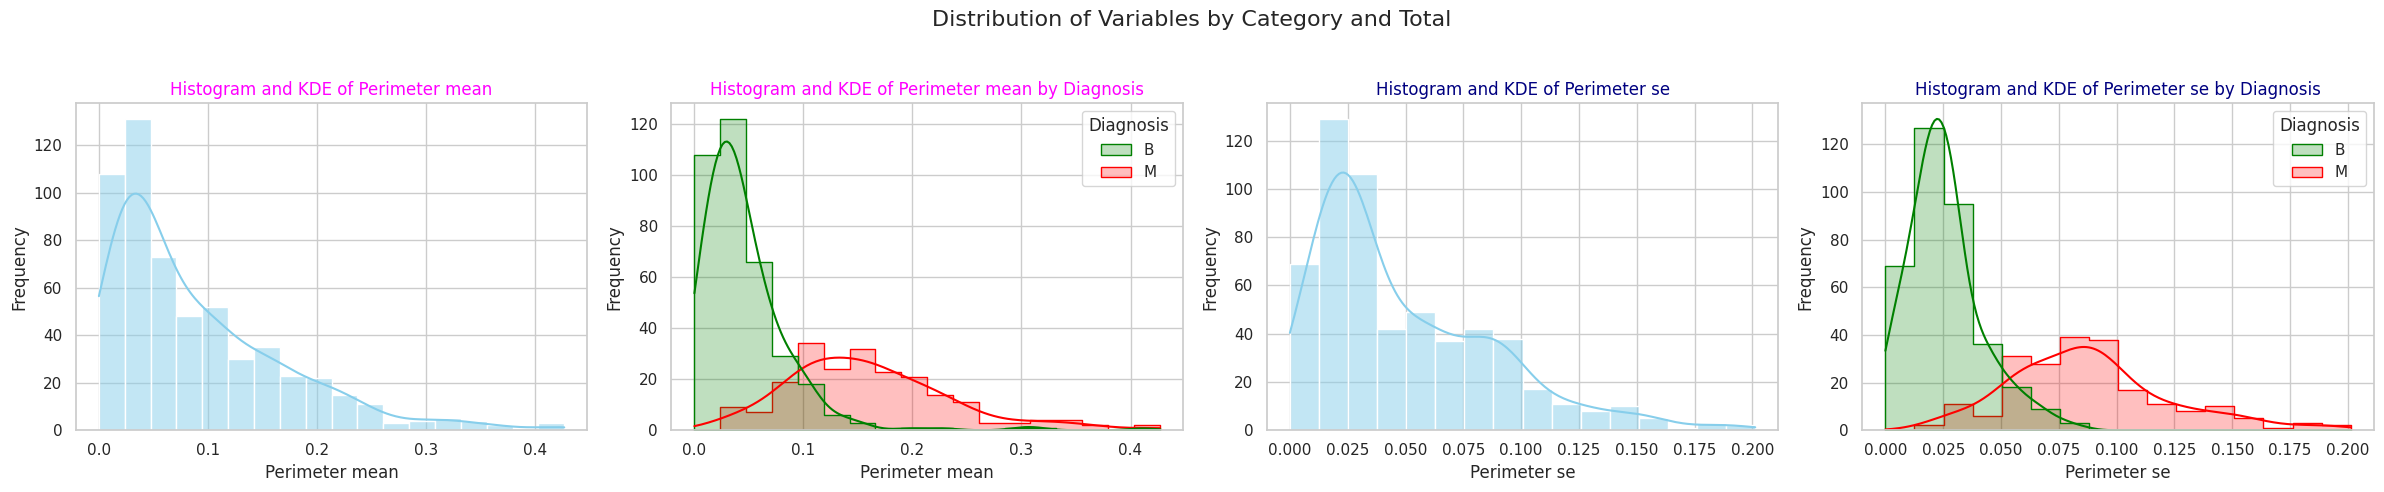

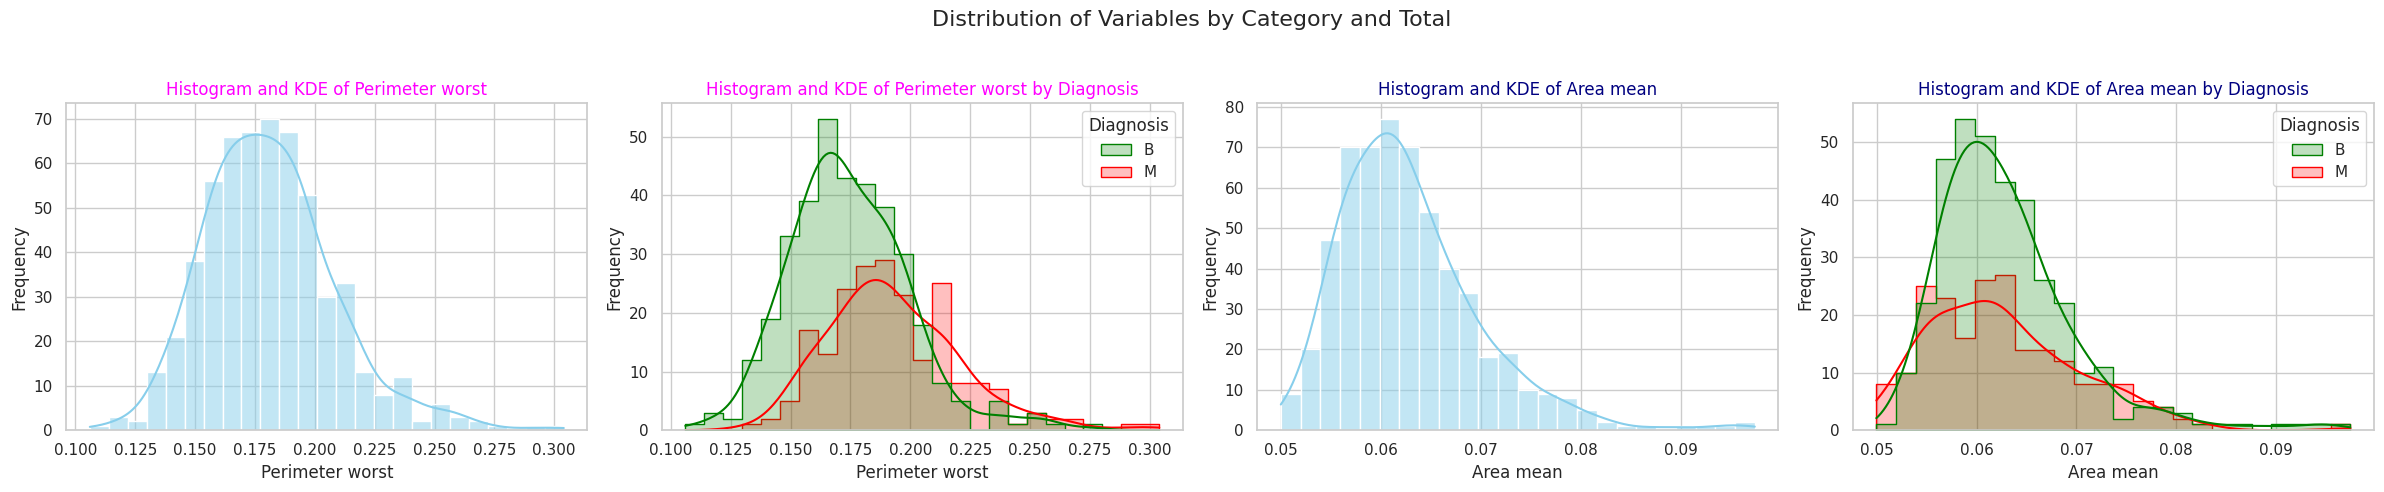

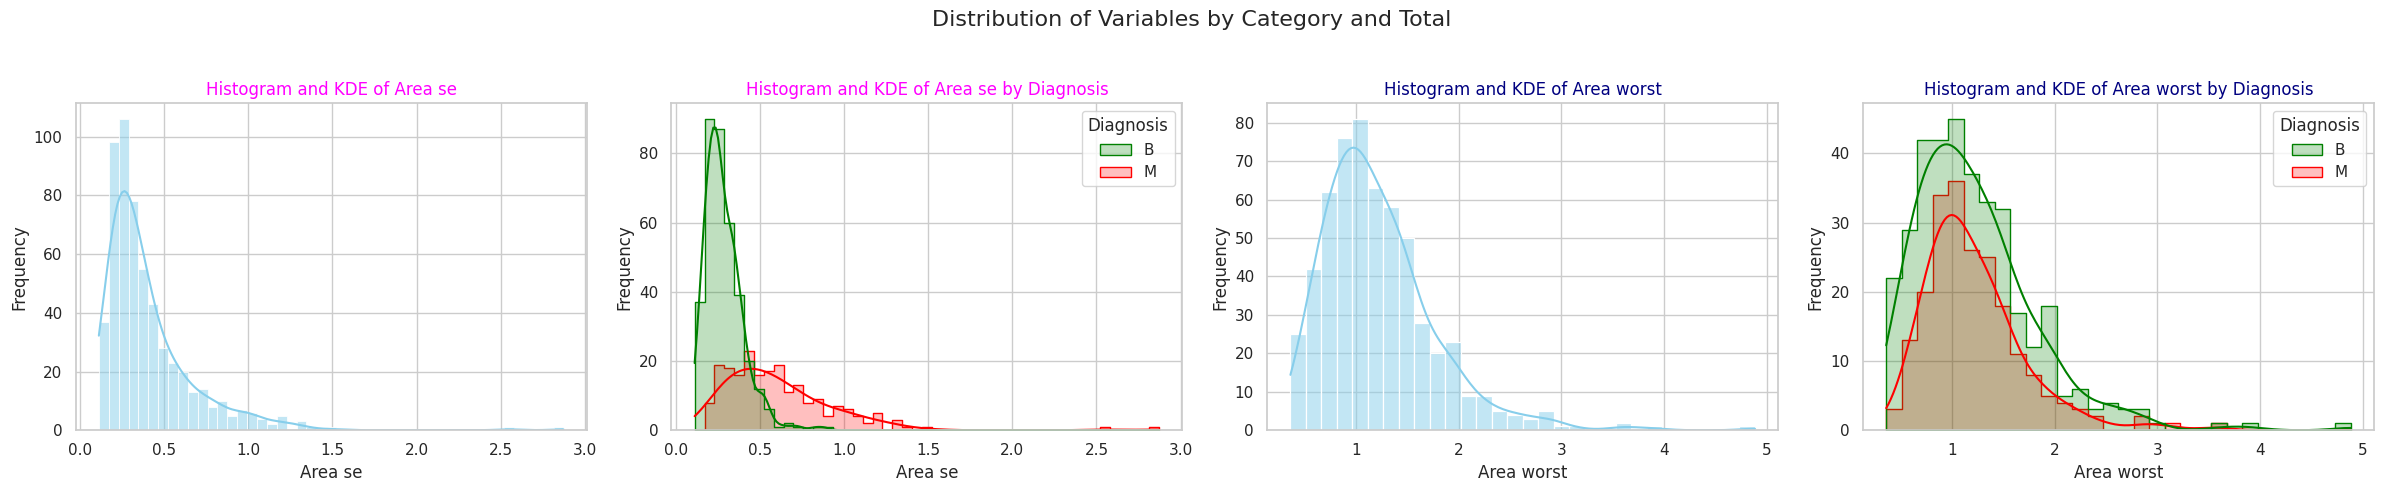

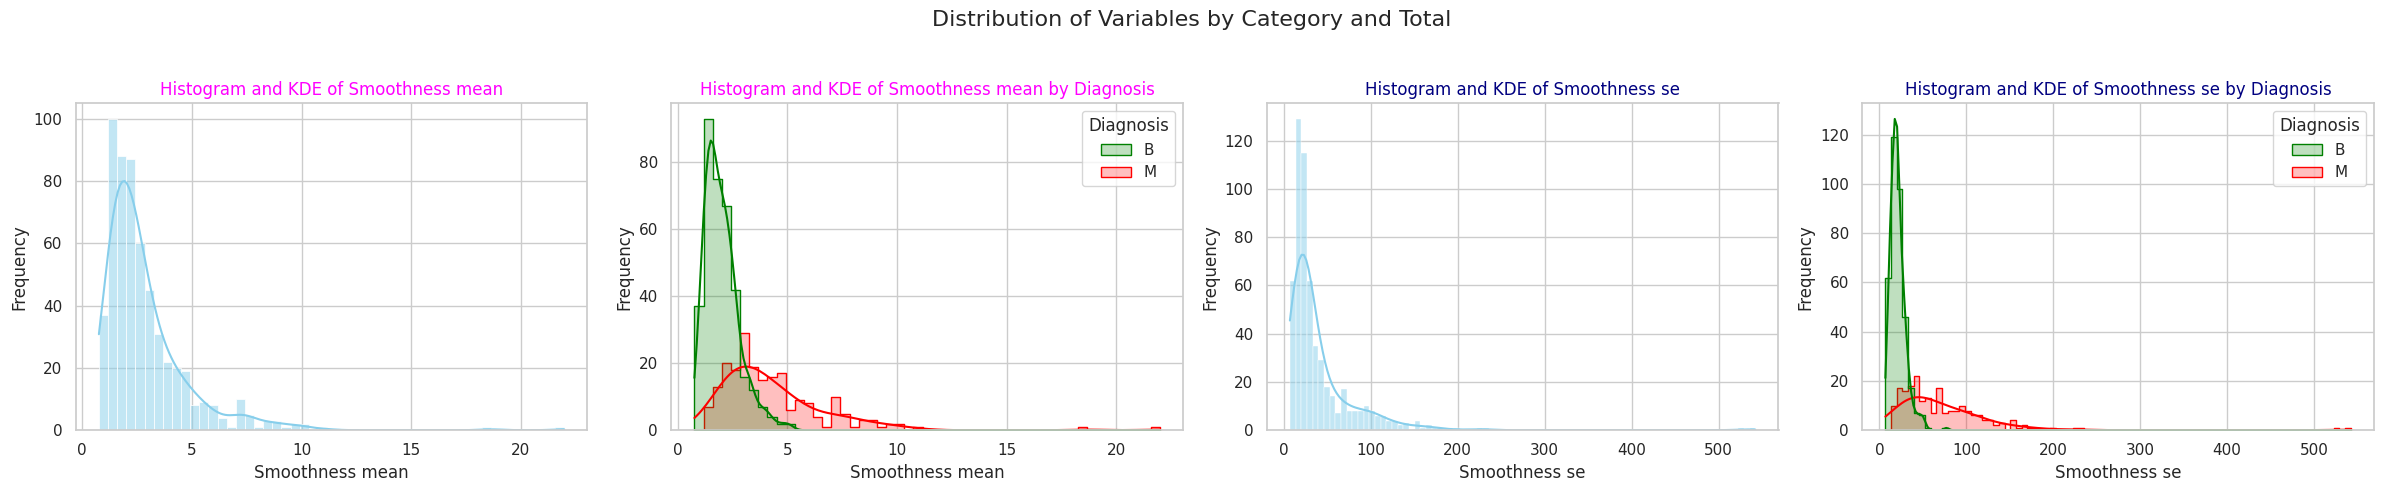

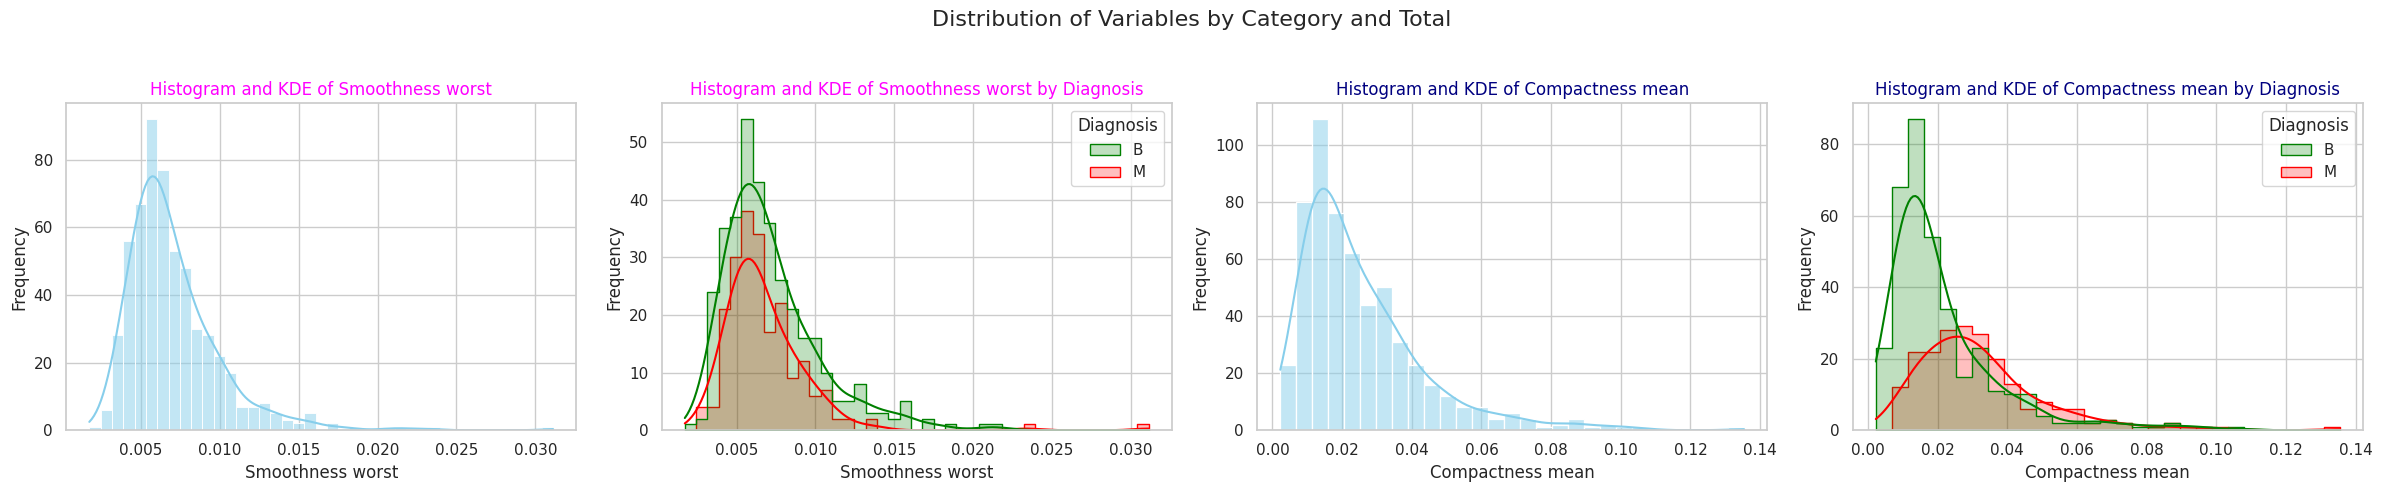

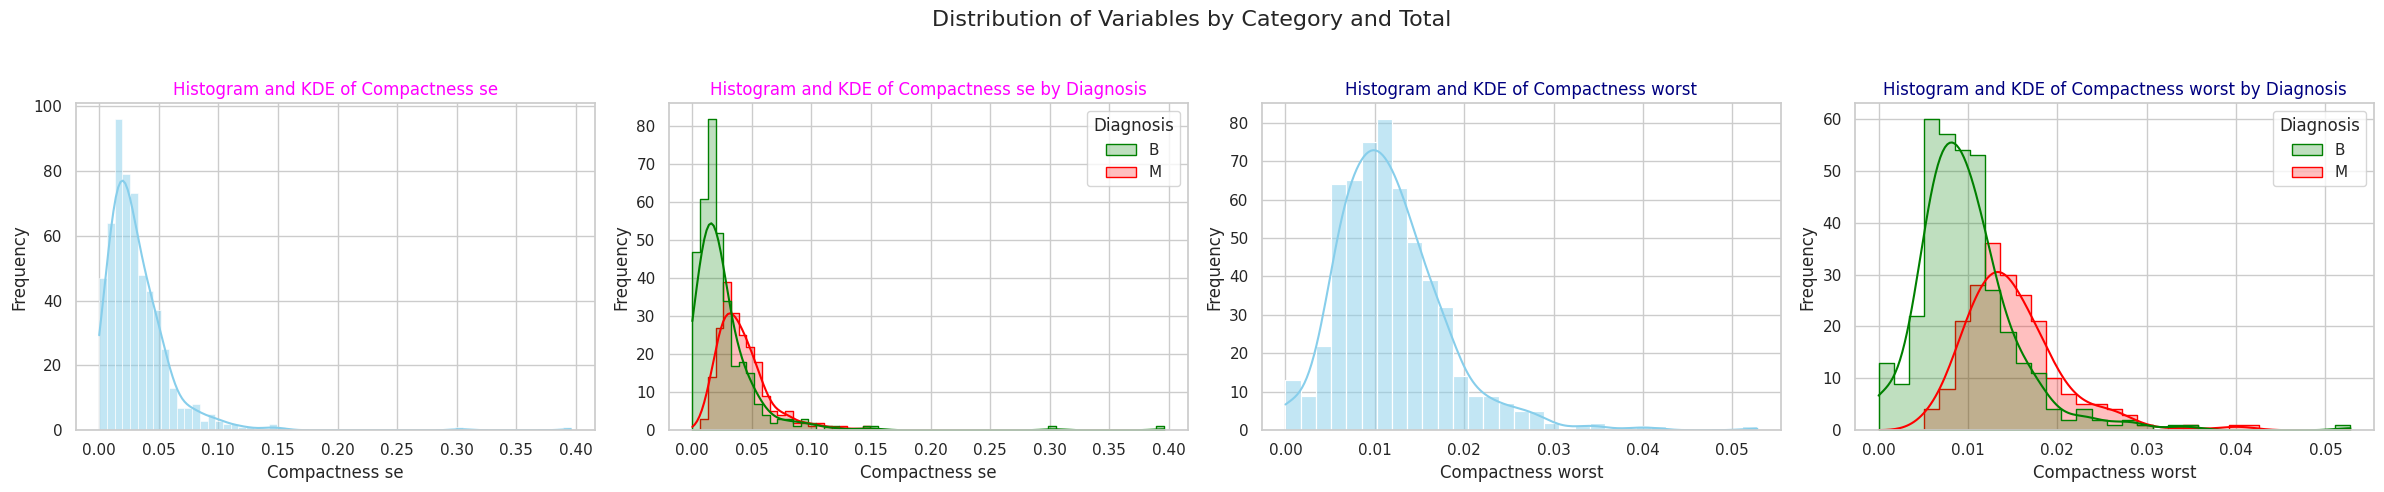

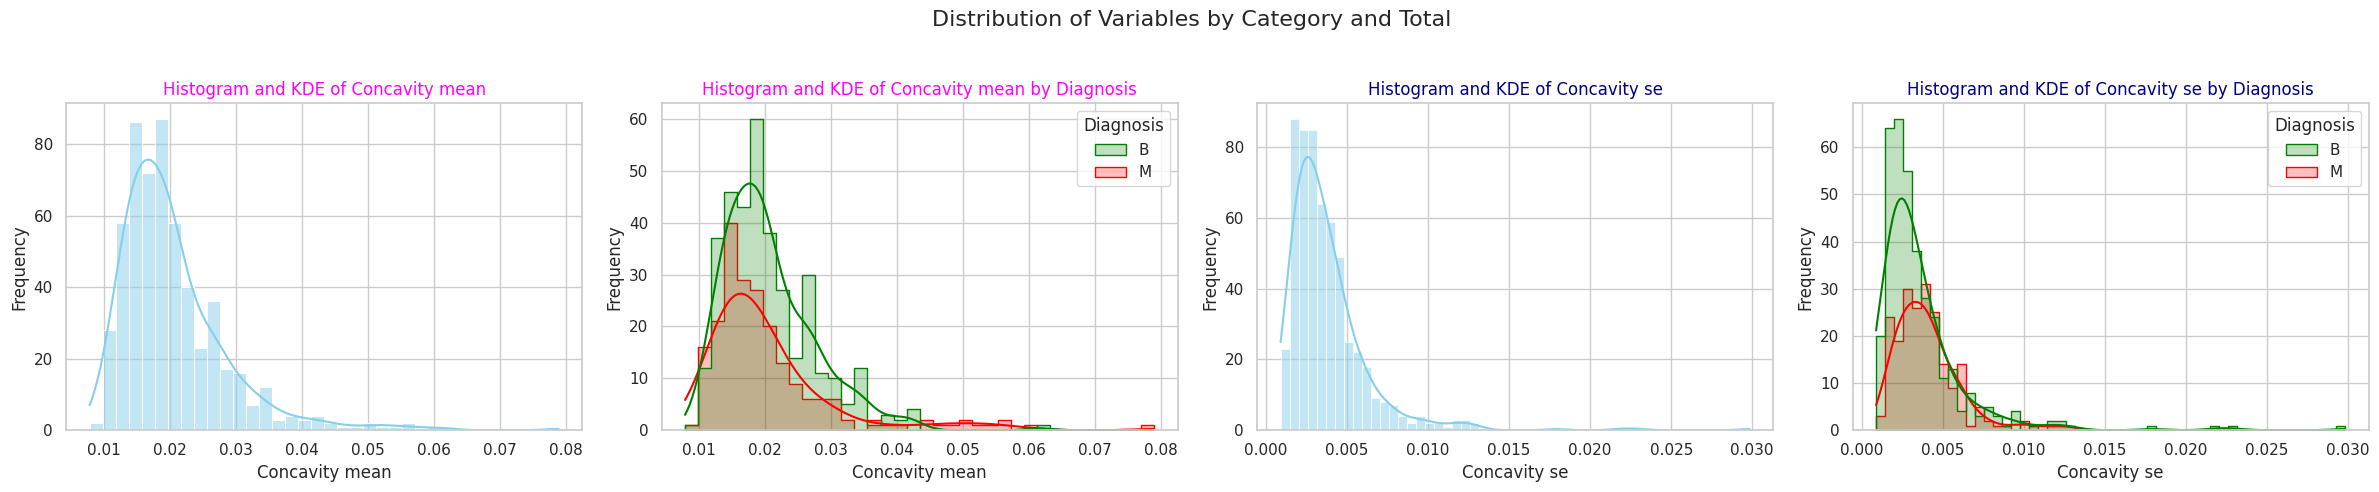

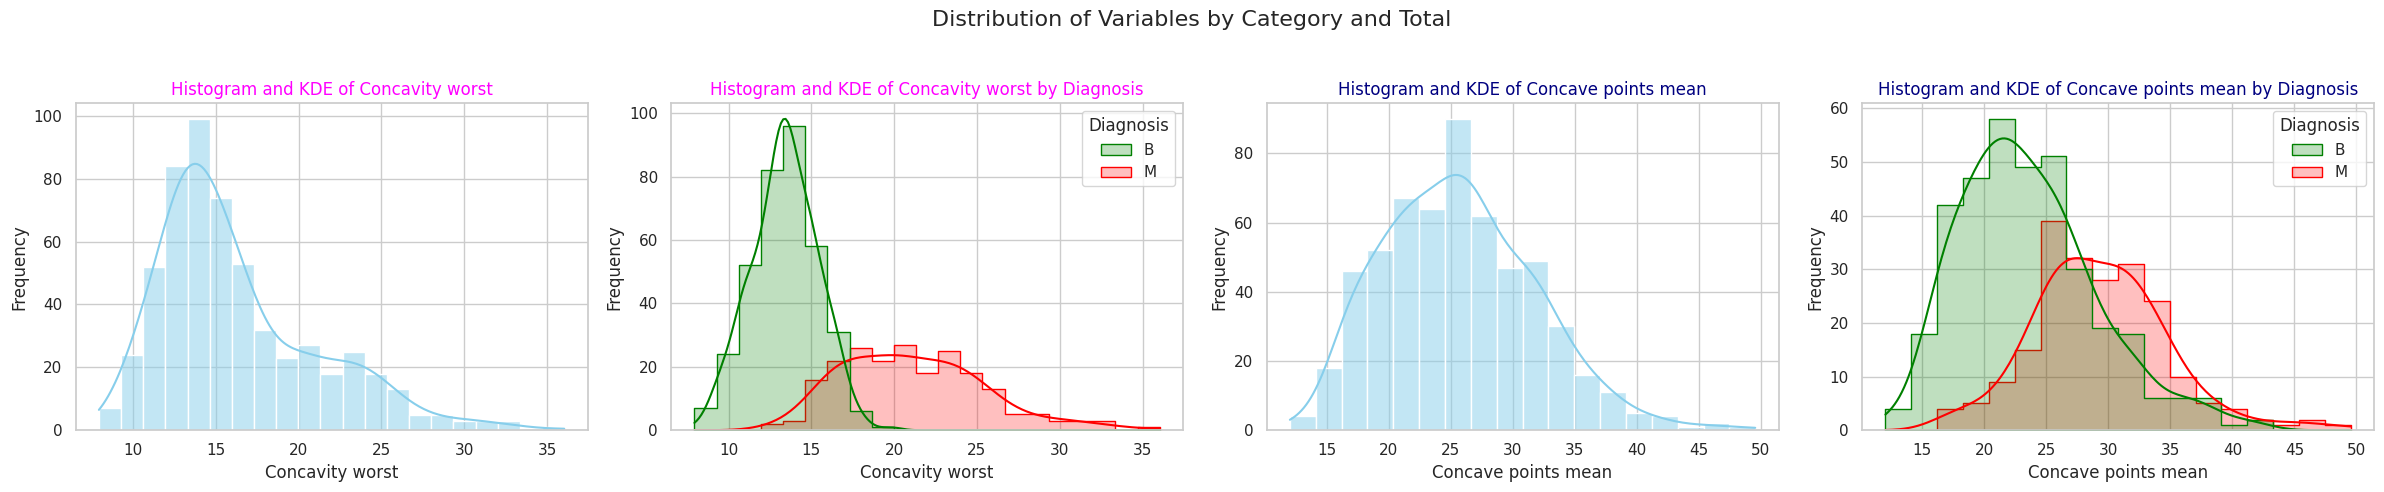

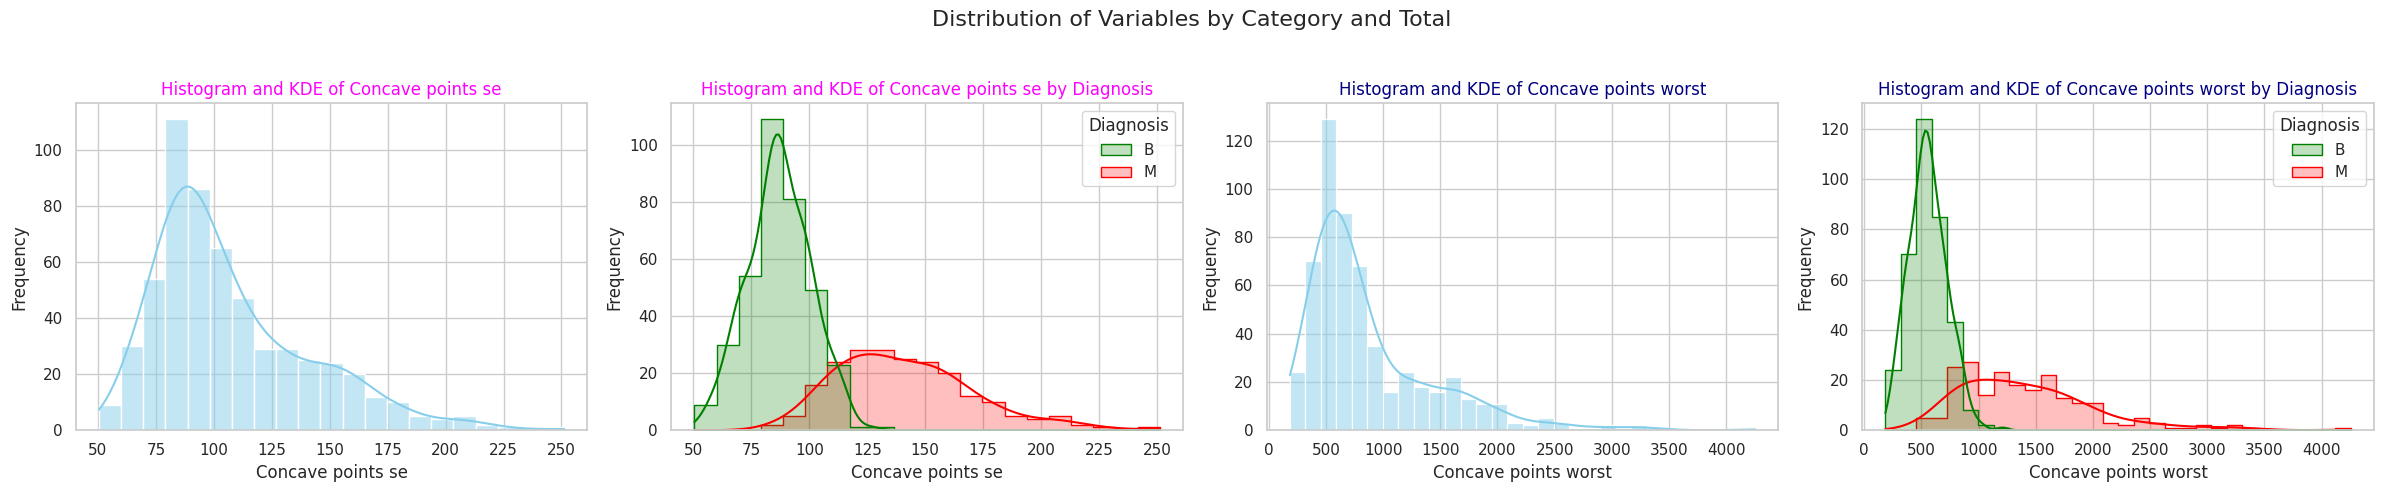

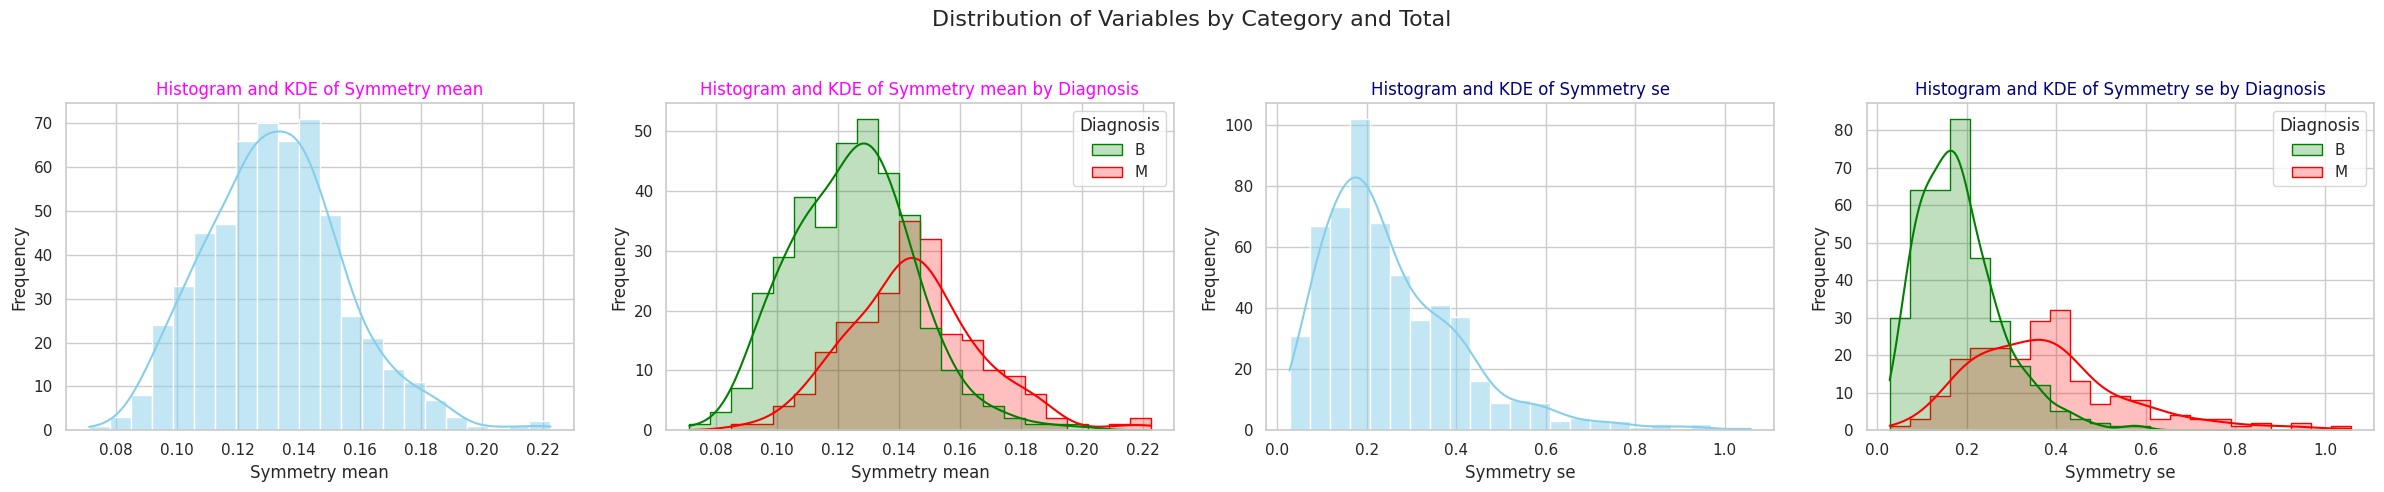

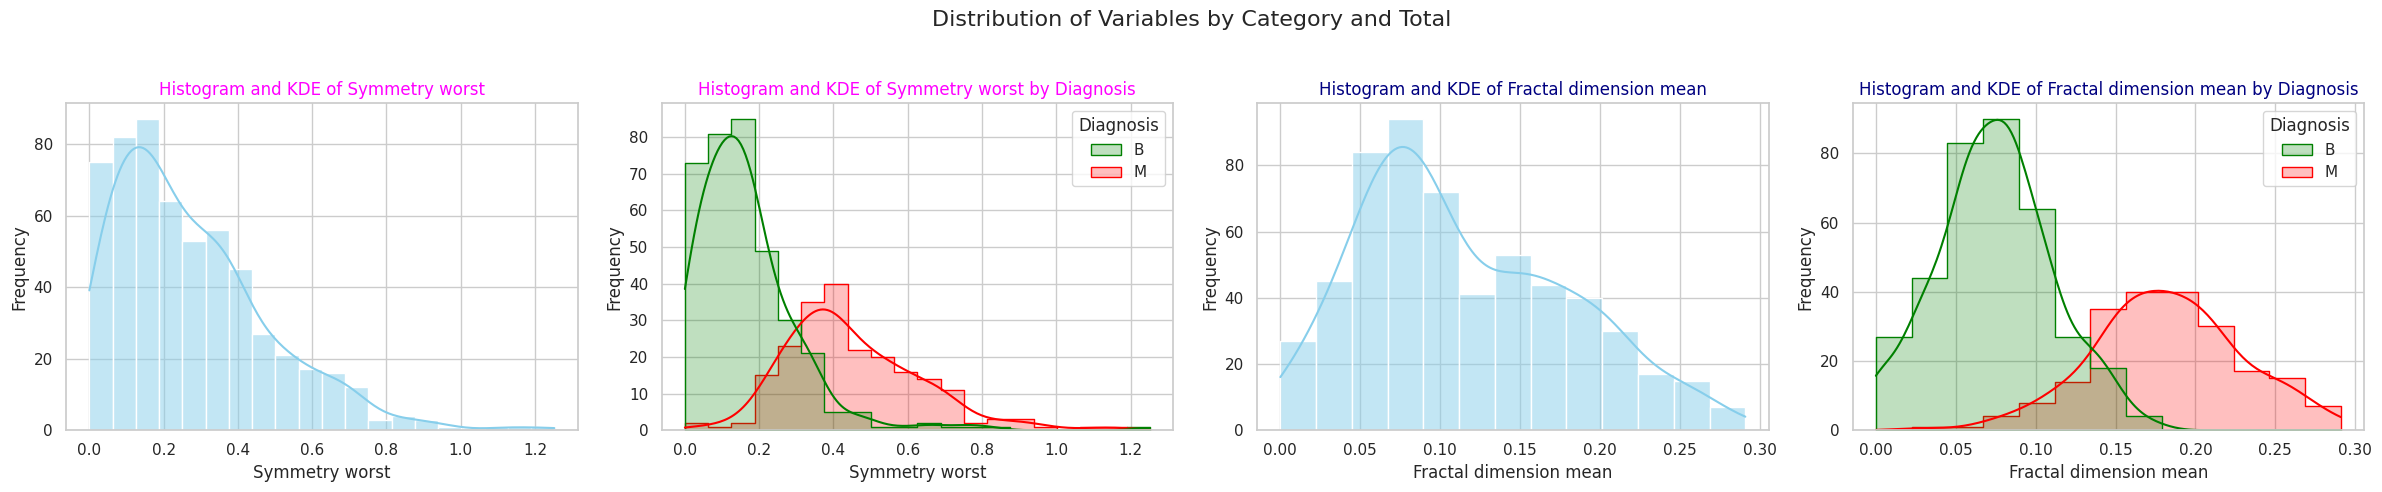

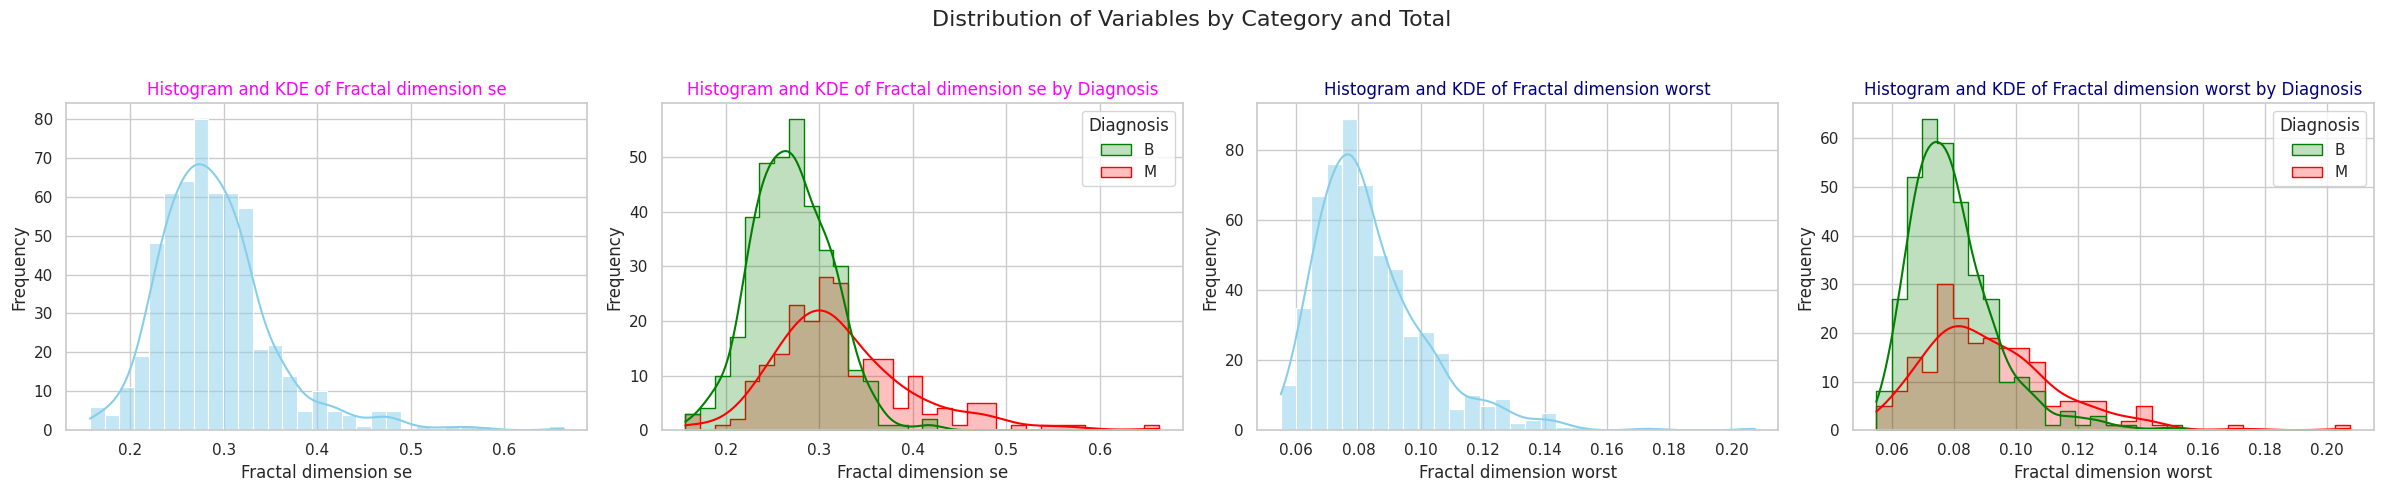

In [8]:
plot_histograms(df)

#<font color='Navy'> Correlations

##High Correlations

In [9]:
high_correlations = get_high_correlations(df, threshold=0.95)

Number of significant correlations (|Correlation| > 0.95): 15



In [10]:
#table with the high correlations in descending order
high_correlations

Variable 1            Variable 2  Correlation
2             Radius mean          Radius worst     0.997855
680     Concave points se       Concavity worst     0.993708
3             Radius mean          Texture mean     0.987357
63           Radius worst          Texture mean     0.986507
710  Concave points worst       Concavity worst     0.984015
683     Concave points se  Concave points worst     0.977578
312               Area se       Smoothness mean     0.972794
662     Concave points se          Radius worst     0.970387
600       Concavity worst           Radius mean     0.969539
602       Concavity worst          Radius worst     0.969476
660     Concave points se           Radius mean     0.965137
603       Concavity worst          Texture mean     0.962746
693  Concave points worst          Texture mean     0.959213
663     Concave points se          Texture mean     0.959120
313               Area se         Smoothness se     0.951830

##Low correlations

In [11]:
low_correlations = get_low_correlations(df, threshold=0.05)

Number of low correlations (|Correlation| < 0.05): 24



In [12]:
low_correlations

Feature 1                Feature 2  Correlation
280                Area mean                  Area se     0.000111
679        Concave points se             Concavity se    -0.001000
649      Concave points mean             Concavity se    -0.003195
873  Fractal dimension worst             Texture mean     0.003738
572             Concavity se             Radius worst    -0.005523
44                 Radius se         Smoothness worst     0.006614
870  Fractal dimension worst              Radius mean     0.007066
541           Concavity mean                Radius se     0.009127
564           Concavity mean            Symmetry mean    -0.012662
883  Fractal dimension worst            Smoothness se     0.017539
573             Concavity se             Texture mean    -0.019887
337               Area worst             Perimeter se     0.021480
709     Concave points worst             Concavity se    -0.022736
34                 Radius se               Texture se    -0.023389
224             Perimeter se         Smoothness worst     0.027653
567           Concavity mean   Fractal dimension mean    -0.030413
634      Concave points mean               Texture se     0.036072
566           Concavity mean           Symmetry worst     0.037119
590             Concavity se          Concavity worst    -0.037488
282                Area mean          Smoothness mean     0.039830
570             Concavity se              Radius mean    -0.042641
359               Area worst  Fractal dimension worst    -0.045655
335               Area worst            Texture worst     0.046205
329                  Area se  Fractal dimension worst     0.049559

#<font color='Navy'> Selecting features with Variance Inflation Factor

In [13]:
clean_df = remove_high_vif_features(df, threshold = 5)

Removing Radius mean with VIF: 3806.12
Removing Concavity worst with VIF: 616.35
Removing Radius worst with VIF: 325.64
Removing Concave points se with VIF: 123.26
Removing Perimeter mean with VIF: 64.65
Removing Area se with VIF: 35.62
Removing Symmetry se with VIF: 33.96
Removing Fractal dimension mean with VIF: 30.60
Removing Texture mean with VIF: 25.39
Removing Texture worst with VIF: 18.84
Removing Concave points mean with VIF: 17.23
Removing Smoothness se with VIF: 16.33
Removing Symmetry worst with VIF: 15.51
Removing Perimeter se with VIF: 8.98
Removing Fractal dimension worst with VIF: 8.39
Removing Symmetry mean with VIF: 7.51
Removing Compactness mean with VIF: 5.13
number of remaining variables: 13


In [14]:
#remainig features
#clean_df.columns

In [15]:
#features_selection = list(clean_df.columns)

In [16]:
#list of reminig features
features_selection = list(clean_df.columns)
print(features_selection)

['Radius se', 'Texture se', 'Perimeter worst', 'Area mean', 'Area worst', 'Smoothness mean', 'Smoothness worst', 'Compactness se', 'Compactness worst', 'Concavity mean', 'Concavity se', 'Concave points worst', 'Fractal dimension se']


In [17]:
#exporting the list in pickle, maintaining the list structure
#it allows us to use it in the trainniing process
list_path = '/content/drive/MyDrive/multilayer_perceptron_neural_network/features_selection.pkl'
with open(list_path, 'wb') as file:
    pickle.dump(features_selection, file)

#<font color='Navy'> Scatter plots

##<font color='Navy'>plot: Highly correlated features

Number of plots to be generated: 15



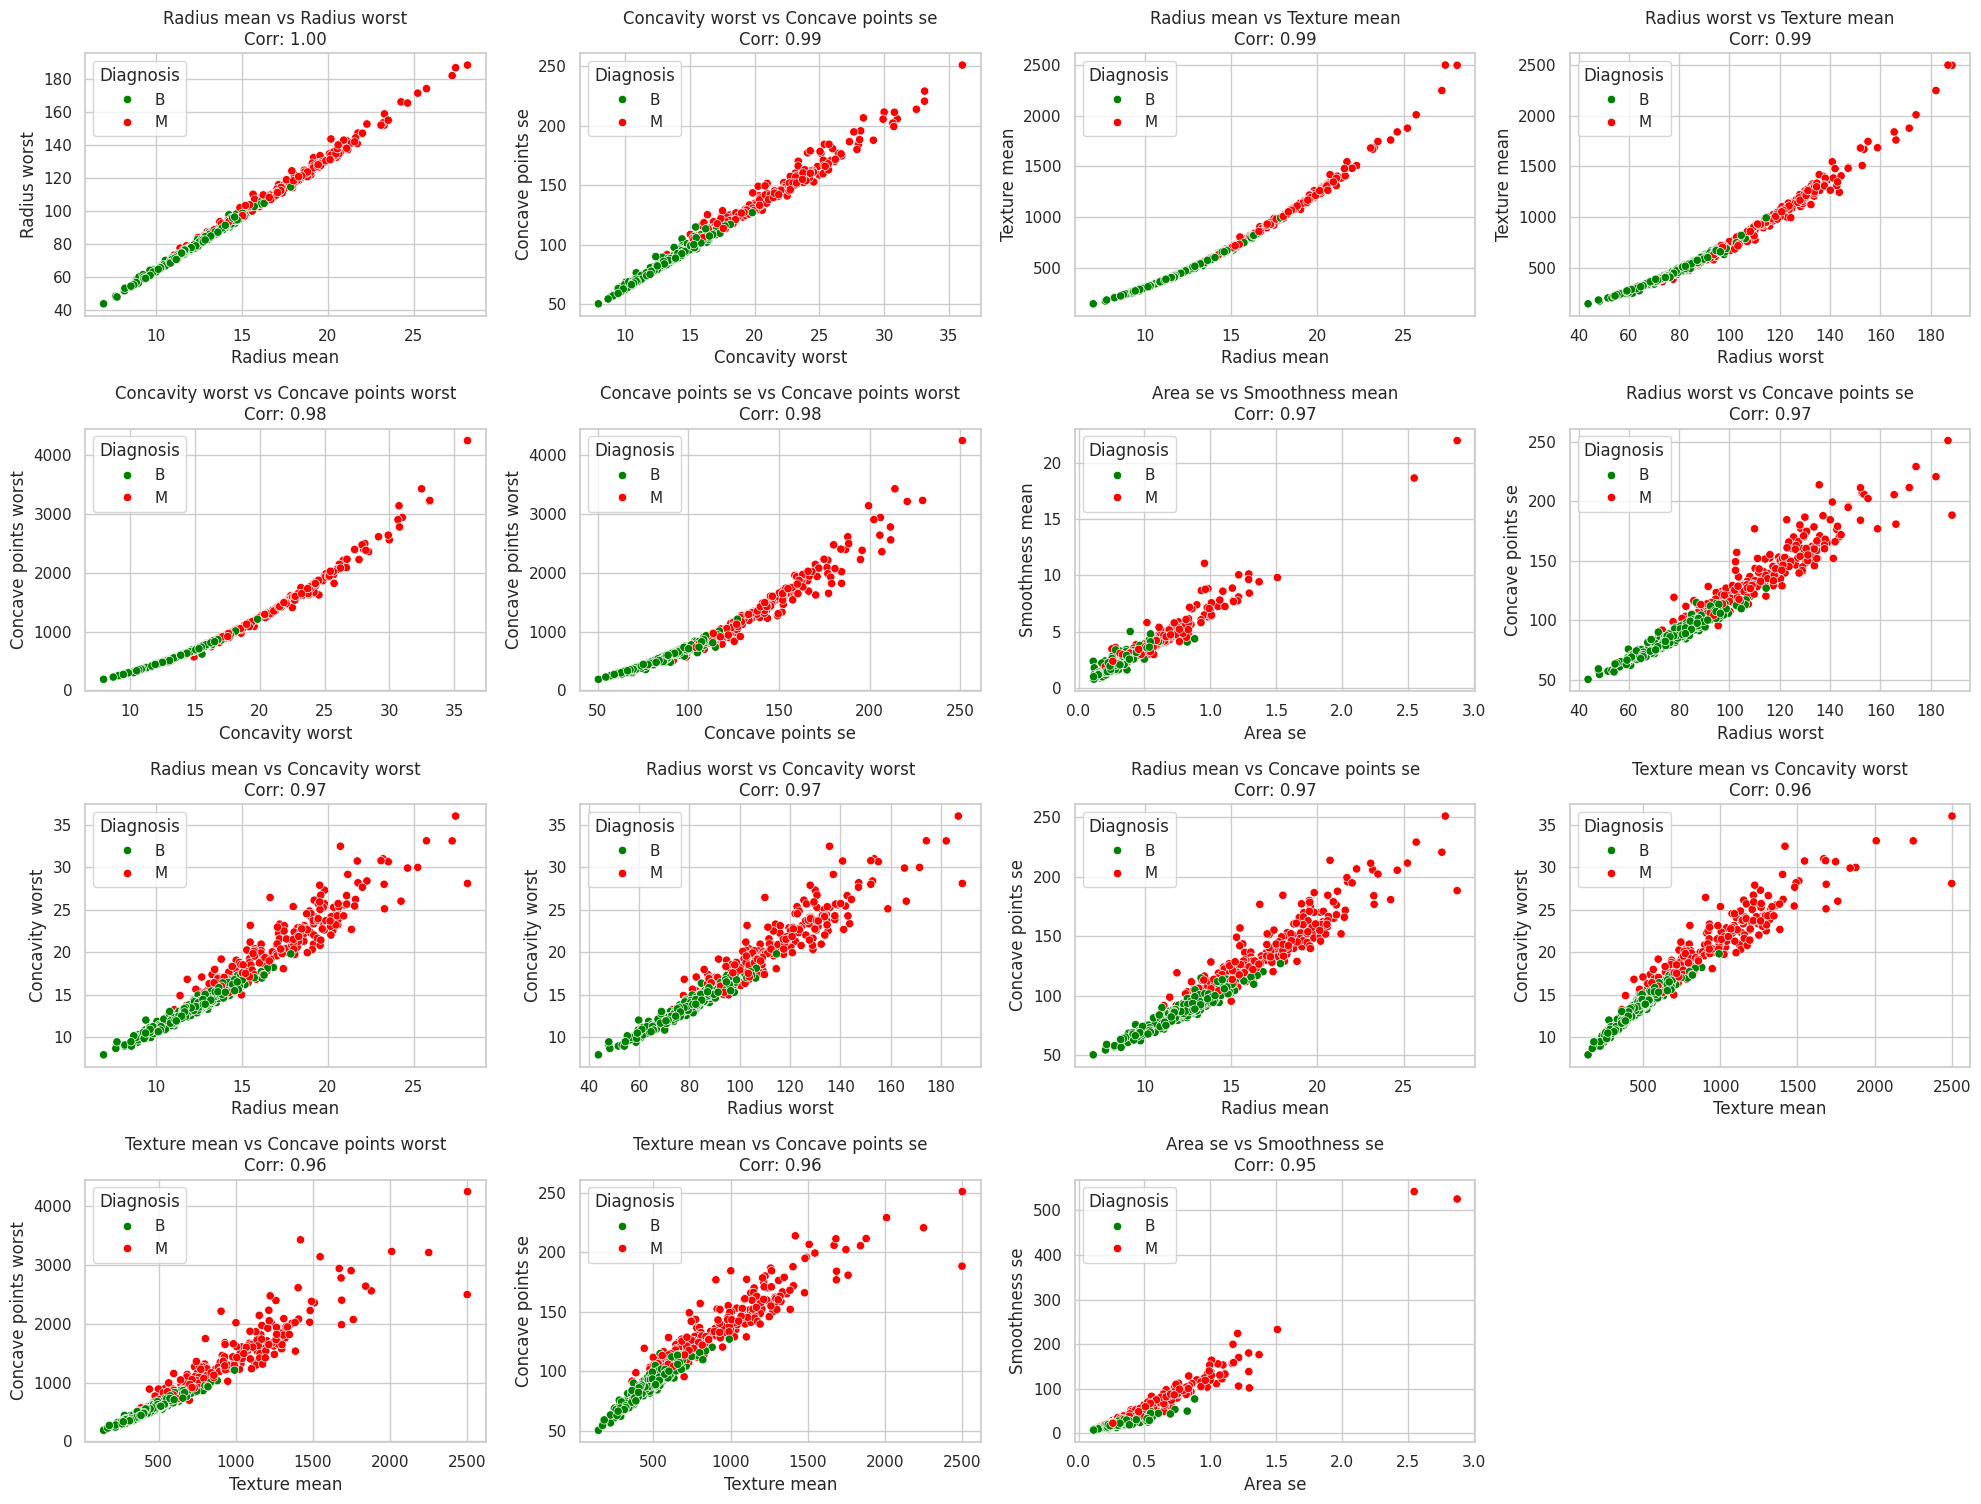

In [18]:
plot_highly_correlated_pairs(df=df, threshold=0.95)

##<font color='Navy'>plot: low correlated features

Number of plots to be generated: 24



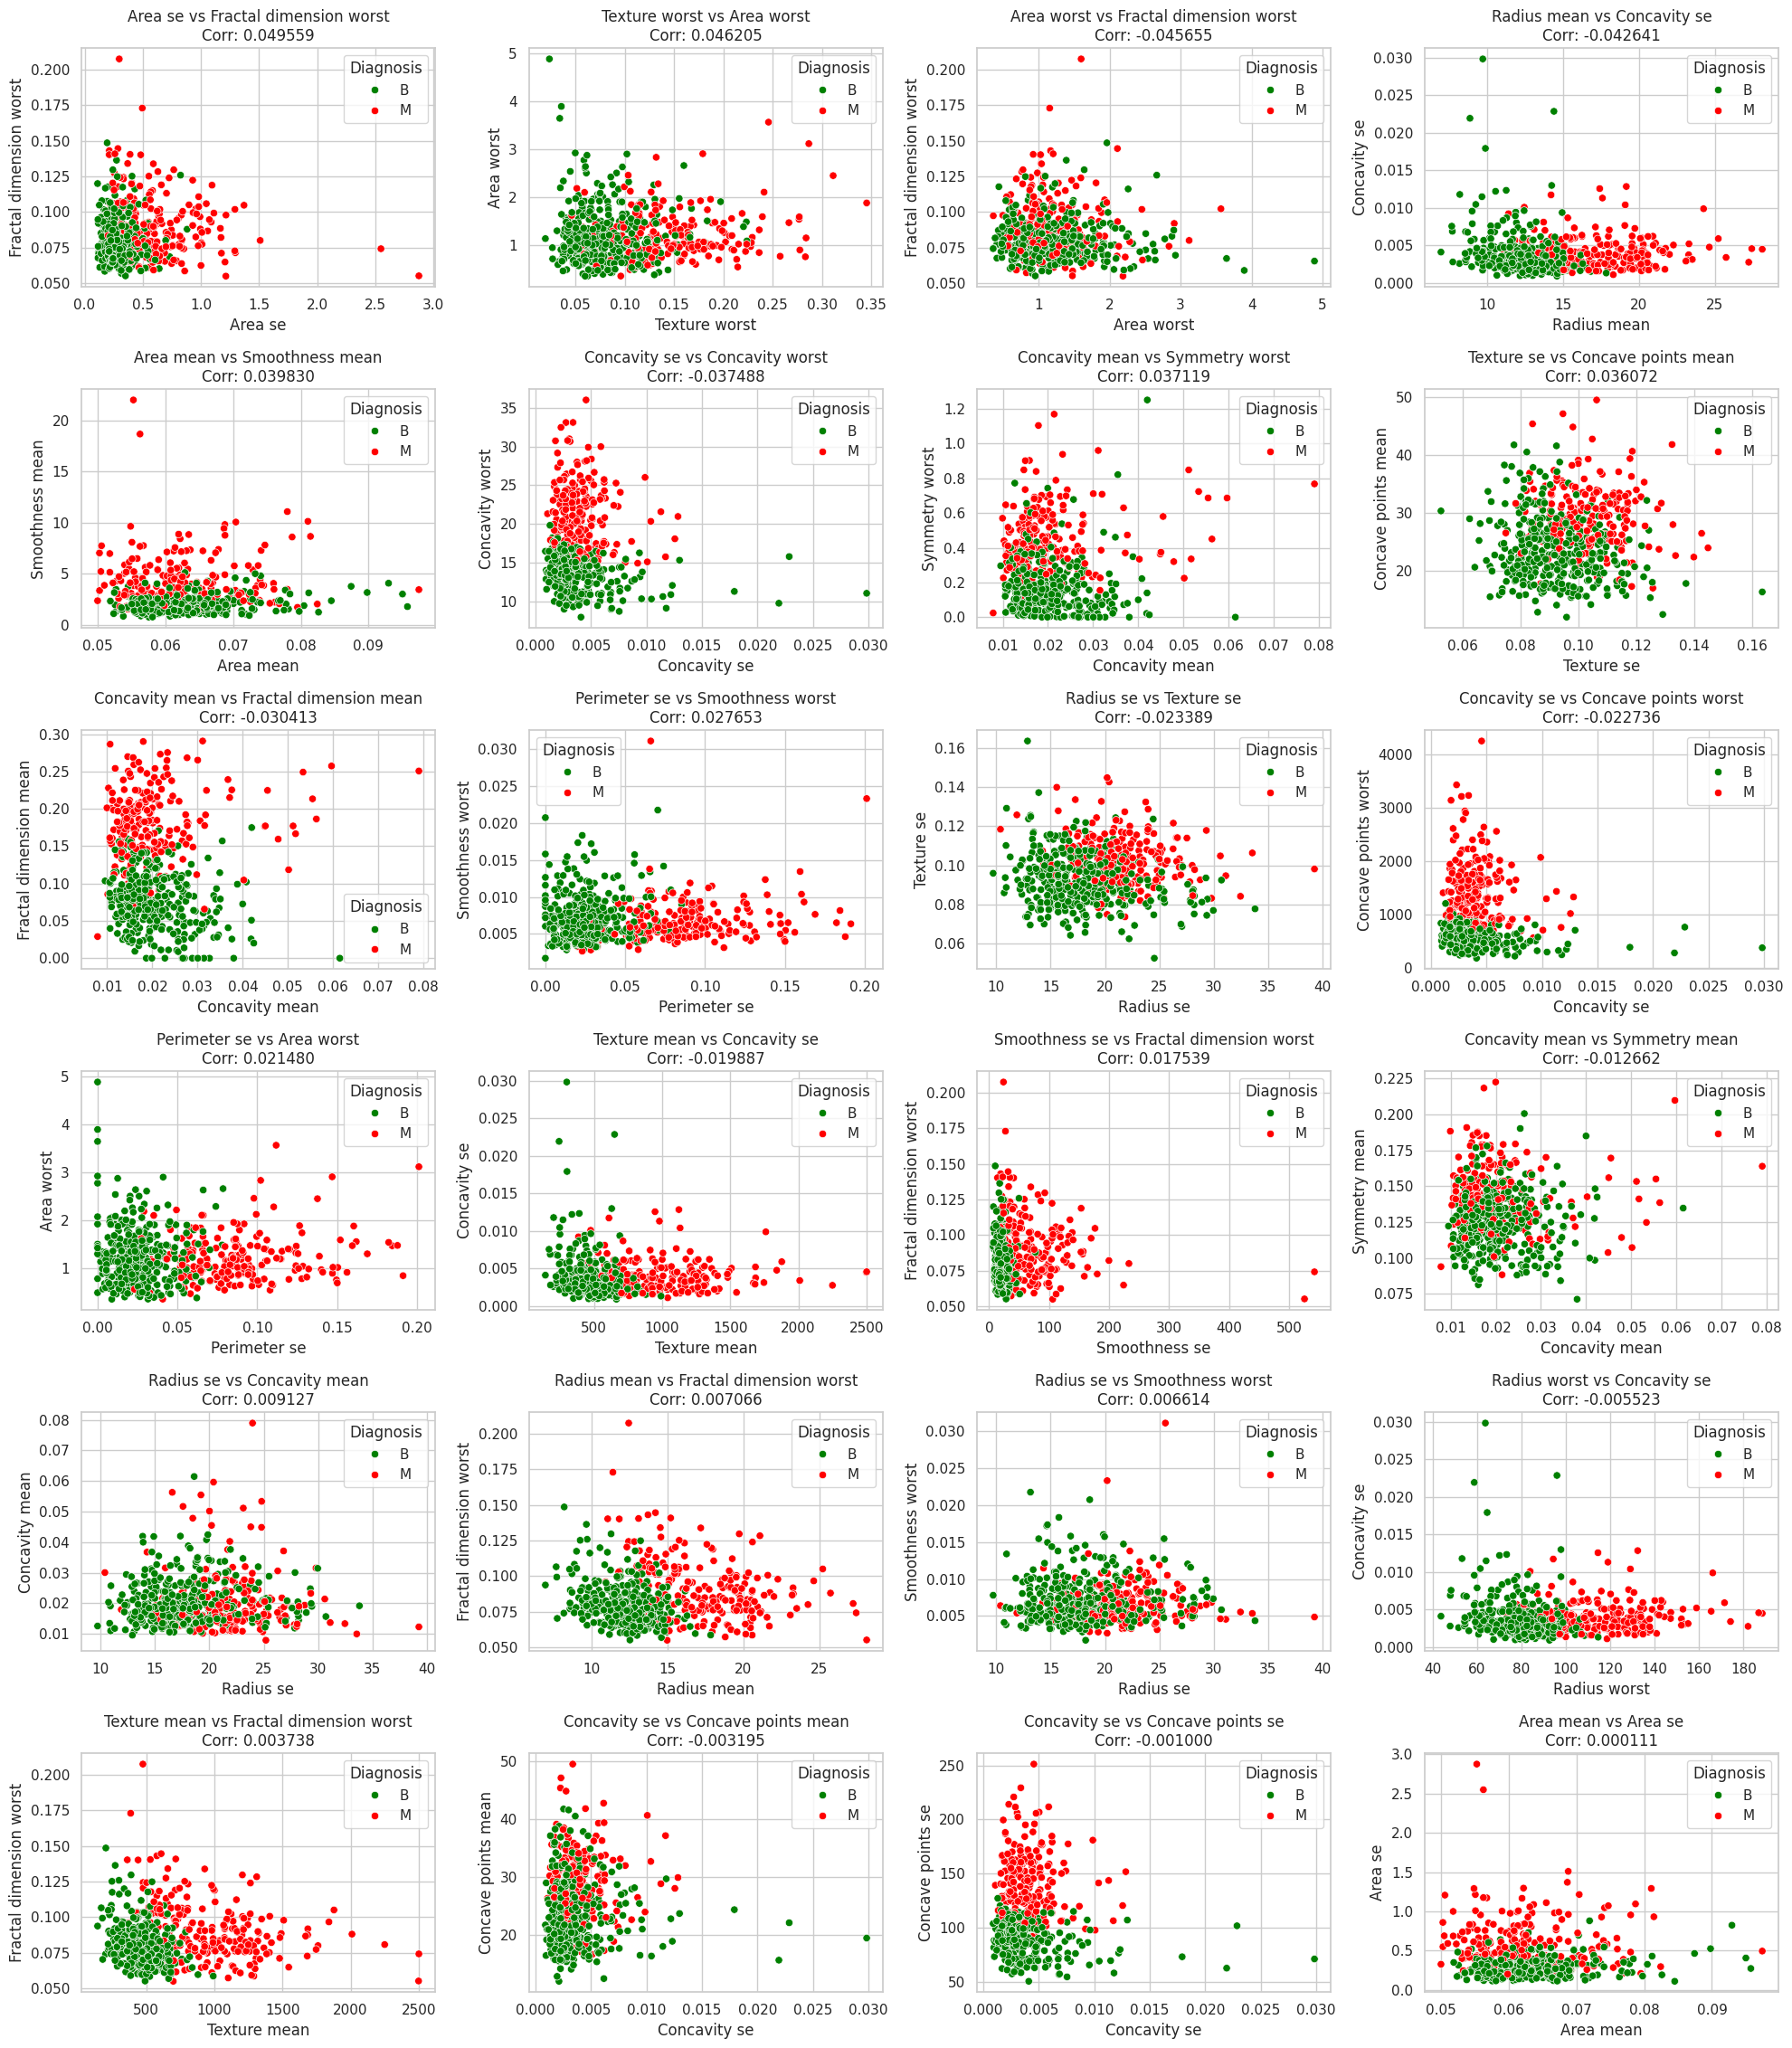

In [19]:
plot_low_correlated_pairs(df, threshold=0.05)